<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/UAS_KecerdasanKomputasional/blob/main/progampython_denganmetodeCNNuntukKlasifikasiBeritaHoaksdanAsli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk wordcloud

In [ ]:
!pip install nltk

In [ ]:
pip install numpy pandas scikit-learn tensorflow matplotlib seaborn

Unique labels in dataset: [1 0]
Unique labels in dataset after mapping: ['Hoaks' 'Asli']


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_25         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 818ms/step - accuracy: 0.5592 - loss: 0.6941 - val_accuracy: 0.8000 - val_loss: 0.6803
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8348 - loss: 0.6618 - val_accuracy: 0.7333 - val_loss: 0.6699
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9246 - loss: 0.6376 - val_accuracy: 0.9333 - val_loss: 0.6501
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9701 - loss: 0.5921 - val_accuracy: 1.0000 - val_loss: 0.6222
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9890 - loss: 0.5519 - val_accuracy: 1.0000 - val_loss: 0.5920
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.5166 - val_accuracy: 1.0000 - val_loss: 0.5616
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.4642 - val_accuracy: 1.0000 - val_loss: 0.5209
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.4018 - val_accuracy: 1.0000 - val_loss: 0.4671

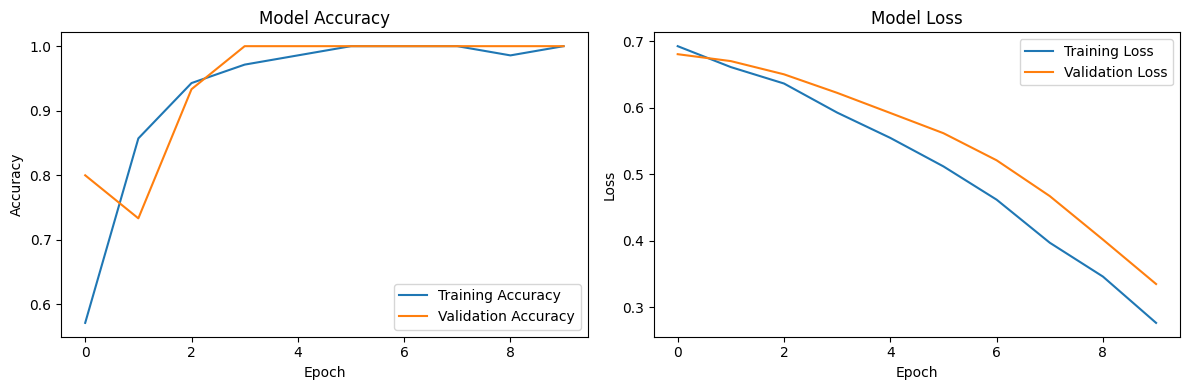

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9333 - loss: 0.3115

Test Accuracy: 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step

Classification Report:
              precision    recall  f1-score   support

        Asli       0.88      1.00      0.93         7
       Hoaks       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



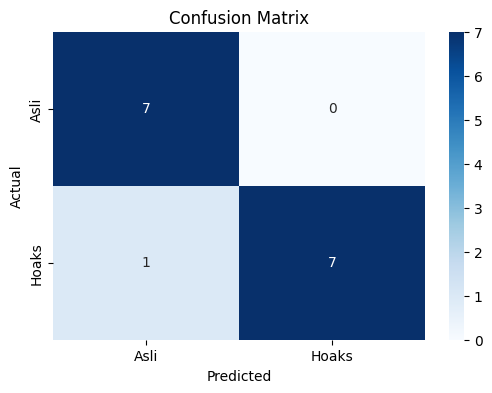


Unique Actual Labels: ['Asli' 'Hoaks']
Unique Predicted Labels: ['Asli' 'Hoaks']

Predictions saved to 'predictions.csv'

=== Semua Prediksi ===
+-----+------------------------------------------------------------+------------------------------+------------+---------------+------------------+
| Index |                            Text                            |            Source            |   Actual   |   Predicted   |      Status      |
+-----+------------------------------------------------------------+------------------------------+------------+---------------+------------------+
|   0   |      Vaksin baru menyebabkan gangguan ginjal permanen      | Mafindo (turnbackhoax.id), 2 |   Hoaks    |     Hoaks     |     Correct      |
|   1   |       Obat tradisional sembuhkan kanker dalam 3 hari       | Mafindo (turnbackhoax.id), 2 |   Hoaks    |     Hoaks     |     Correct      |
|   2   |       Obat herbal baru sembuhkan stroke dalam 24 jam       |        Kominfo, 2025         |   Hoak

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Mengatur pandas untuk menampilkan teks penuh
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# 1. Fungsi untuk memuat dan memproses data
def load_and_preprocess_data(file_path, text_column, label_column, source_column, max_words=10000, max_len=100):
    # Memuat dataset
    df = pd.read_csv(file_path)

    # Validasi kolom
    required_columns = [text_column, label_column, source_column]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Dataset must contain '{text_column}', '{label_column}', and '{source_column}' columns")

    # Validasi dan bersihkan data
    if df[text_column].isnull().any() or df[label_column].isnull().any() or df[source_column].isnull().any():
        raise ValueError("Dataset contains null values in 'text', 'label', or 'source' columns")

    # Cetak label unik untuk debugging
    print("Unique labels in dataset:", df[label_column].unique())

    # Konversi label numerik ke string (0 = Asli, 1 = Hoaks)
    label_mapping = {0: 'Asli', 1: 'Hoaks'}
    df[label_column] = df[label_column].astype(int).map(label_mapping)

    # Validasi label setelah mapping
    valid_labels = {'Asli', 'Hoaks'}
    if not set(df[label_column].unique()).issubset(valid_labels):
        raise ValueError(f"Invalid labels found in dataset: {df[label_column].unique()}. Expected 'Asli' or 'Hoaks'")

    # Cetak label unik setelah mapping
    print("Unique labels in dataset after mapping:", df[label_column].unique())

    # Mengambil teks, label, dan source
    texts = df[text_column].values
    labels = df[label_column].values
    sources = df[source_column].values

    # Encode label untuk model (Asli: 0, Hoaks: 1)
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Tokenisasi teks
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)

    # Padding sequences agar panjangnya seragam
    X = pad_sequences(sequences, maxlen=max_len)

    # Membagi data menjadi train, validation, dan test
    X_train, X_temp, y_train, y_temp, texts_train, texts_temp, sources_train, sources_temp = train_test_split(
        X, labels_encoded, texts, sources, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test, texts_val, texts_test, sources_val, sources_test = train_test_split(
        X_temp, y_temp, texts_temp, sources_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test, texts_test, sources_test, tokenizer, label_encoder

# 2. Fungsi untuk membangun model CNN
def build_cnn_model(vocab_size, embedding_dim=100):
    model = Sequential([
        # Lapisan Embedding
        Embedding(vocab_size, embedding_dim),
        # Lapisan Konvolusi
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        # Lapisan Dense
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Output biner
    ])

    # Kompilasi model
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model

# 3. Fungsi untuk melatih model
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    # Callback untuk early stopping dan menyimpan model terbaik
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

    # Melatih model
    history = model.fit(X_train, y_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping, checkpoint])

    return history

# 4. Fungsi untuk mengevaluasi model dan menampilkan prediksi rapi
def evaluate_model(model, X_test, y_test, texts_test, sources_test, label_encoder):
    # Evaluasi model pada data uji
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")

    # Prediksi
    y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Asli', 'Hoaks']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Asli', 'Hoaks'], yticklabels=['Asli', 'Hoaks'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Mendapatkan label asli
    actual_labels = label_encoder.inverse_transform(y_test)
    predicted_labels = label_encoder.inverse_transform(y_pred)

    # Debug: Cetak nilai unik label
    print("\nUnique Actual Labels:", np.unique(actual_labels))
    print("Unique Predicted Labels:", np.unique(predicted_labels))

    # Membuat DataFrame untuk semua prediksi
    prediction_status = ['Correct' if actual == pred else 'Incorrect' for actual, pred in zip(actual_labels, predicted_labels)]
    results = pd.DataFrame({
        'Index': range(len(texts_test)),
        'Text': texts_test,
        'Source': sources_test,
        'Actual Label': actual_labels,
        'Predicted Label': predicted_labels,
        'Prediction Status': prediction_status
    })

    # Menyimpan hasil prediksi ke CSV
    results.to_csv('predictions.csv', index=False)
    print("\nPredictions saved to 'predictions.csv'")

    # Menampilkan semua prediksi dengan format rapi
    print("\n=== Semua Prediksi ===")
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))
    print("| {:^5} | {:^58} | {:^28} | {:^10} | {:^13} | {:^16} |".format(
        'Index', 'Text', 'Source', 'Actual', 'Predicted', 'Status'))
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))
    for _, row in results.iterrows():
        print("| {:^5} | {:^58} | {:^28} | {:^10} | {:^13} | {:^16} |".format(
            row['Index'], row['Text'][:58], row['Source'][:28], row['Actual Label'], row['Predicted Label'], row['Prediction Status']))
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))

    # Memisahkan berita Asli dan Hoaks berdasarkan prediksi
    real_predictions = results[results['Predicted Label'] == 'Asli']
    hoax_predictions = results[results['Predicted Label'] == 'Hoaks']

    # Menampilkan berita Asli dengan format rapi
    print("\n=== Berita yang Diklasifikasikan sebagai Asli ===")
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))
    print("| {:^5} | {:^58} | {:^28} | {:^10} | {:^13} | {:^16} |".format(
        'Index', 'Text', 'Source', 'Actual', 'Predicted', 'Status'))
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))
    for _, row in real_predictions.iterrows():
        print("| {:^5} | {:^58} | {:^28} | {:^10} | {:^13} | {:^16} |".format(
            row['Index'], row['Text'][:58], row['Source'][:28], row['Actual Label'], row['Predicted Label'], row['Prediction Status']))
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))

    # Menampilkan berita Hoaks dengan format rapi
    print("\n=== Berita yang Diklasifikasikan sebagai Hoaks ===")
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))
    print("| {:^5} | {:^58} | {:^28} | {:^10} | {:^13} | {:^16} |".format(
        'Index', 'Text', 'Source', 'Actual', 'Predicted', 'Status'))
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))
    for _, row in hoax_predictions.iterrows():
        print("| {:^5} | {:^58} | {:^28} | {:^10} | {:^13} | {:^16} |".format(
            row['Index'], row['Text'][:58], row['Source'][:28], row['Actual Label'], row['Predicted Label'], row['Prediction Status']))
    print("+{:-^5}+{:-^60}+{:-^30}+{:-^12}+{:-^15}+{:-^18}+".format('', '', '', '', '', ''))

# 5. Fungsi untuk visualisasi hasil pelatihan
def plot_training_history(history):
    # Plot akurasi
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 6. Fungsi utama
def main():
    # Parameter
    file_path = '/content/drive/MyDrive/Colab Notebooks/news_dataset_100.csv'
    text_column = 'text'
    label_column = 'label'
    source_column = 'source'
    max_words = 10000
    max_len = 100
    embedding_dim = 100
    epochs = 10
    batch_size = 32

    # Memuat dan memproses data
    X_train, X_val, X_test, y_train, y_val, y_test, texts_test, sources_test, tokenizer, label_encoder = load_and_preprocess_data(
        file_path, text_column, label_column, source_column, max_words, max_len)

    # Membangun model
    model = build_cnn_model(max_words, embedding_dim)
    model.summary()

    # Melatih model
    history = train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size)

    # Visualisasi hasil pelatihan
    plot_training_history(history)

    # Evaluasi model
    evaluate_model(model, X_test, y_test, texts_test, sources_test, label_encoder)

if __name__ == "__main__":
    main()